# EDA: Fraud Dataset



In [6]:
# EDA: Fraud Dataset
!pip install polars

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 1.0 MB/s eta 0:00:38
    --------------------------------------- 0.8/39.5 MB 1.1 MB/s eta 0:00:37
   - -------------------------------------- 1.0/39.5 MB 1.1 MB/s eta 0:00:35
   - -------------------------------------- 1.6/39.5 MB 1.3 MB/s eta 0:00:30
   -- ------------------------------------- 2.1/39.5 MB 1.5 MB/s eta 0:00:26
   -- ------------------------------------- 2.6/39.5 MB 1.6 MB/s eta 0:00:23
   -- ------------------------------------- 2.9/39.5 MB 1.7 MB/s eta 0:00:22
   --- ------------------------------------ 3.7/39.5 MB 1.8 MB/s eta 0:00:20
   ---- ----------------------------------- 4.2/39.5 MB 2.0 MB/s eta 0:00:19
   ----- ---------------------------------- 5.2/39.5 MB 2.2 MB/s eta 0:00:16
   ------ ----------

In [10]:
from pathlib import Path
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

data_path = Path('../data/processed/fraud.parquet')
df = pl.read_parquet(data_path)
df.head()


step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0


In [11]:
df.shape, df.null_count()


((6362620, 11),
 shape: (1, 11)
 ┌──────┬──────┬────────┬──────────┬───┬────────────────┬────────────────┬─────────┬────────────────┐
 │ step ┆ type ┆ amount ┆ nameOrig ┆ … ┆ oldbalanceDest ┆ newbalanceDest ┆ isFraud ┆ isFlaggedFraud │
 │ ---  ┆ ---  ┆ ---    ┆ ---      ┆   ┆ ---            ┆ ---            ┆ ---     ┆ ---            │
 │ u32  ┆ u32  ┆ u32    ┆ u32      ┆   ┆ u32            ┆ u32            ┆ u32     ┆ u32            │
 ╞══════╪══════╪════════╪══════════╪═══╪════════════════╪════════════════╪═════════╪════════════════╡
 │ 0    ┆ 0    ┆ 0      ┆ 0        ┆ … ┆ 0              ┆ 0              ┆ 0       ┆ 0              │
 └──────┴──────┴────────┴──────────┴───┴────────────────┴────────────────┴─────────┴────────────────┘)

In [12]:
# Class balance
df.select(pl.col('isFraud').value_counts()).to_pandas()


,isFraud
0,"{'isFraud': 1, 'count': 8213}"
1,"{'isFraud': 0, 'count': 6354407}"


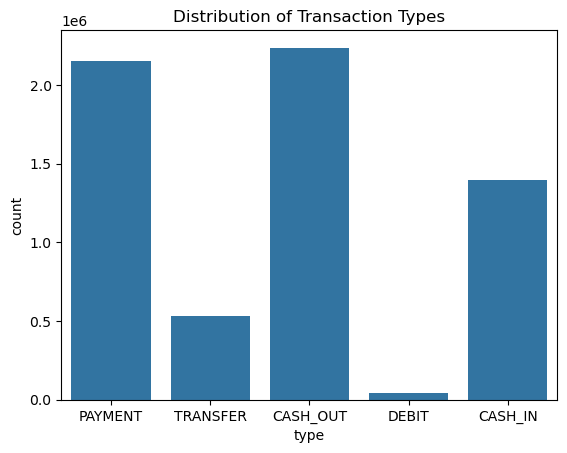

In [5]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# --- FIX: Add this line to load your data ---
# This reads your data from the file into the 'df' variable
df = pl.read_parquet('../data/processed/fraud.parquet')

# Your original code will now work
# Convert to pandas for seaborn
pdf = df.to_pandas()

# Create the plot
sns.countplot(x='type', data=pdf)
plt.title('Distribution of Transaction Types')
plt.show()